# Prework

Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import numpy as np

Chargeons le dataframe

In [2]:
data = pd.read_csv('../raw_data/data_full.csv')

In [3]:
data.owners.value_counts()

0-20000                18530
20000-50000             3018
50000-100000            1675
100000-200000           1367
200000-500000           1240
500000-1000000           493
1000000-2000000          286
2000000-5000000          191
5000000-10000000          42
10000000-20000000         20
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: owners, dtype: int64

In [4]:
data.head(20)

,steam_appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,0,0,0,0,0,0,0,0,550
1,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,0,0,0,0,0,5,122,0,0,0
2,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,0,0,0,0,0,0,0,0,0,0
3,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,...,0,0,0,0,0,0,0,0,0,0
4,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,0,0,0,0,0,0,0,0,0,0
5,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,...,0,0,0,0,0,0,0,0,63,0
6,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,...,0,0,0,0,0,0,0,0,607,0
7,240,Counter-Strike: Source,2004-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action,...,0,0,0,0,0,0,0,0,0,400
8,300,Day of Defeat: Source,2010-07-12,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action,...,0,0,0,0,0,0,272,0,0,0
9,340,Half-Life 2: Lost Coast,2005-10-27,1,Valve,Valve,windows;mac;linux,0,Single-player;Commentary available,Action,...,0,0,0,0,0,0,0,0,0,0


# Retrait des colonnes non pertinentes

Les colonnes de requirements sont abandonnées car peu pertinantes dans l'analyse du prix et des owners.

In [5]:
data.drop(columns=['pc_requirements', 'mac_requirements', 'linux_requirements', 'minimum', 'recommended'], inplace=True)

De même les colonnes de support sont peu pertinantes pour nous.

In [6]:
data.drop(columns=['support_email', 'support_url'], inplace=True)

La colonne "movies" serait un peu trop complexe à analyser pour le moment, puisque qu'elle comprend des vidéos, et est très incomplète. 

In [7]:
data.drop(columns=['movies'], inplace=True)

La colonne "age" semble très incomplète. C'est pourquoi nous ne la prendront pas en compte.

In [8]:
data['required_age'].value_counts()

0     26284
18      307
16      187
12       67
7        12
3        11
Name: required_age, dtype: int64

In [9]:
data.drop(columns=['required_age'], inplace=True)

# Analyse des colonnes restantes

Il n'y a presque plus de valeurs manquantes et/ou nulles. (à l'exception de la colonne 'website')

In [10]:
obj = data.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

steam_appid , 0
name , 0
release_date , 0
english , 0
developer , 0
publisher , 0
platforms , 0
categories , 0
genres , 0
steamspy_tags , 0
achievements , 0
positive_ratings , 0
negative_ratings , 0
average_playtime , 0
median_playtime , 0
owners , 0
price , 0
detailed_description , 0
about_the_game , 0
short_description , 0
header_image , 0
screenshots , 0
background , 0
website , 8988
1980s , 0
1990s , 0
2.5d , 0
2d , 0
2d_fighter , 0
360_video , 0
3d , 0
3d_platformer , 0
3d_vision , 0
4_player_local , 0
4x , 0
6dof , 0
atv , 0
abstract , 0
action , 0
action_rpg , 0
action_adventure , 0
addictive , 0
adventure , 0
agriculture , 0
aliens , 0
alternate_history , 0
america , 0
animation_&_modeling , 0
anime , 0
arcade , 0
arena_shooter , 0
artificial_intelligence , 0
assassin , 0
asynchronous_multiplayer , 0
atmospheric , 0
audio_production , 0
bmx , 0
base_building , 0
baseball , 0
based_on_a_novel , 0
basketball , 0
batman , 0
battle_royale , 0
beat_em_up , 0
beautiful , 0
benchmark 

Transformons la colonne 'release_date' en datetime

In [11]:
data['release_date'] = data['release_date'].astype('datetime64')

# Observations des min/max

Observons les valeurs des prix

In [12]:
data.sort_values(by = 'price', ascending = False).head()[['price', 'name']]

,price,name
20909,421.99,ADR-Labelling Game
12882,303.99,GameMaker Studio 2 UWP
9861,209.99,Houdini Indie
25363,154.99,Bible Test
10736,154.99,Silhouette


le jeux le plus cher semble être une valeur erronée, retirons la ligne.

In [13]:
data = data.drop(index=20909)

In [14]:
data.dtypes

steam_appid              int64
name                    object
release_date    datetime64[ns]
english                  int64
developer               object
                     ...      
world_war_i              int64
world_war_ii             int64
wrestling                int64
zombies                  int64
e_sports                 int64
Length: 395, dtype: object

# Création de nouvelles features

Rajoutons les min, max, medians pour les owners, ainsi qu'une colonne 'revenue' basée sur la mediane des owners et le prix

In [15]:
tmp = pd.DataFrame()
tmp[['lower', 'upper']] = data['owners'].str.split('-', expand = True)
tmp['lower'] = tmp['lower'].astype('int')
tmp['upper'] = tmp['upper'].astype('int')
tmp['owner_median'] = (tmp['lower'] + tmp['upper']) / 2
tmp

,lower,upper,owner_median
0,10000000,20000000,15000000.0
1,5000000,10000000,7500000.0
2,5000000,10000000,7500000.0
3,5000000,10000000,7500000.0
4,10000000,20000000,15000000.0
...,...,...,...
26863,0,20000,10000.0
26864,0,20000,10000.0
26865,0,20000,10000.0
26866,0,20000,10000.0


In [16]:
data['owner_median'] = tmp['owner_median']
data['owner_lower'] = tmp['lower']
data['owner_upper'] = tmp['upper']

Create a column "has_a_website"

In [17]:
data.website = data['website'].fillna(0)

In [18]:
condition = lambda x: 1 if x != 0 else 0

In [19]:
data['has_a_website'] = data.website.apply(condition)

Création d'une colonne nombre total de review

In [20]:
data['nb_review'] = data['positive_ratings'] + data['negative_ratings']

# Etude de l'intervalle 0-20000

In [21]:
new_data = data[data["owner_median"] == 10000]
new_data.shape

(18529, 400)

<AxesSubplot:>

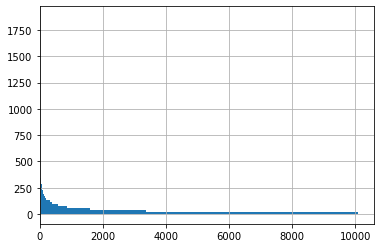

In [22]:
new_data.nb_review.hist(bins=100, orientation='horizontal',)

(array([1.7749e+04, 6.1900e+02, 1.2500e+02, 2.6000e+01, 6.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 1.8890e+02, 3.7680e+02, 5.6470e+02, 7.5260e+02,
        9.4050e+02, 1.1284e+03, 1.3163e+03, 1.5042e+03, 1.6921e+03,
        1.8800e+03]),
 <BarContainer object of 10 artists>)

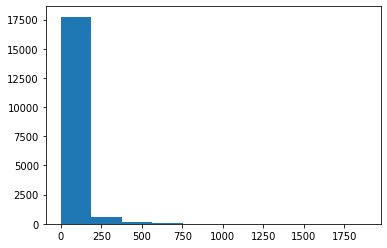

In [23]:
plt.hist(new_data.nb_review)

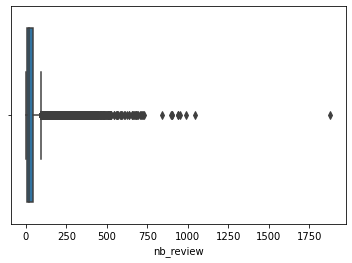

In [24]:
ax = sns.boxplot(data=new_data,x="nb_review", )

[array([6., 1.]), array([42., 96.])]

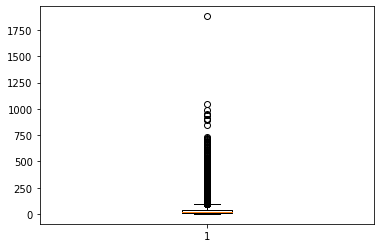

In [25]:
B = plt.boxplot(new_data.nb_review)
[item.get_ydata() for item in B['whiskers']]

In [26]:
new_data = new_data.sort_values(by='nb_review', ascending=False)

In [27]:
new_data.head(11)

,steam_appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,...,world_war_i,world_war_ii,wrestling,zombies,e_sports,owner_median,owner_lower,owner_upper,has_a_website,nb_review
20828,819500,Fear The Wolves,2019-02-06,1,Vostok Games,Focus Home Interactive,windows,Multi-player;Online Multi-Player;Online Co-op;...,Action;Adventure;Massively Multiplayer,Battle Royale;FPS;Survival,...,0,0,0,0,0,10000.0,0,20000,1,1880
23965,921390,武林志（Wushu Chronicles）,2019-04-09,0,JiangHu Studio,Snail Games,windows,Single-player,Adventure;Casual;Indie;RPG;Simulation,RPG;Indie;Adventure,...,0,0,0,0,0,10000.0,0,20000,0,1046
2922,295950,新流星搜劍錄,2017-12-20,0,Titans,Titans,windows,Multi-player;Online Multi-Player;MMO,Violent;Action;Adventure;Indie;Massively Multi...,Action;RPG;Fighting,...,0,0,0,0,0,10000.0,0,20000,0,987
9096,477730,Eador. Imperium,2017-01-27,1,Snowbird Games,Snowbird Games,windows,Single-player;Steam Achievements;Steam Trading...,Indie;RPG;Strategy,Strategy;Indie;RPG,...,0,0,0,0,0,10000.0,0,20000,1,953
9586,495990,True Love ～Confide to the Maple～,2016-10-05,1,SP-time,SP-time,windows,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Indie,Visual Novel;Casual;Indie,...,0,0,0,0,0,10000.0,0,20000,1,940
14115,623080,planetarian HD,2017-05-08,0,VisualArts/Key,VisualArts,windows,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Simulation,Visual Novel;Anime;Casual,...,0,0,0,0,0,10000.0,0,20000,0,937
12389,571880,Angels with Scaly Wings,2017-01-31,1,Radical Phi,Radical Phi,windows;mac;linux,Single-player;Steam Achievements;Steam Trading...,Violent;Adventure;Indie;RPG;Simulation,Dragons;Visual Novel;Dating Sim,...,0,0,0,0,0,10000.0,0,20000,1,903
2478,280010,Gunjitsu,2015-07-31,1,Decent Machine,Beatnik Games,windows;mac,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Indie;Early Access,Early Access;Action;Indie,...,0,0,0,0,0,10000.0,0,20000,1,903
2842,293220,H-Hour: World's Elite,2015-05-19,1,SOF Studios Ltd,SOF Studios Ltd,windows,Multi-player;Steam Achievements;Full controlle...,Action;Indie;Early Access,Early Access;Action;Indie,...,0,0,0,0,0,10000.0,0,20000,1,895
18965,766280,A Light in the Dark,2018-06-15,1,CreSpirit;Storia;Narrator,Sekai Project,windows;mac,Single-player;Steam Achievements;Steam Trading...,Violent;Gore;Casual;Indie,Gore;Indie;Visual Novel,...,0,0,0,0,0,10000.0,0,20000,1,844


In [28]:
alpha = round(20000/96)
alpha

208

In [29]:
new_data['owner_estimated'] = new_data['nb_review'] * alpha

In [97]:
new_data[['name', 'nb_review', 'owner_estimated']].head(150)

,name,nb_review,owner_estimated
20828,Fear The Wolves,1880,20000
23965,武林志（Wushu Chronicles）,1046,20000
2922,新流星搜劍錄,987,20000
9096,Eador. Imperium,953,20000
9586,True Love ～Confide to the Maple～,940,20000
...,...,...,...
25117,Flower,383,20000
10221,Trickster VR: Co-op Dungeon Crawler,383,20000
20263,The Ditzy Demons Are in Love With Me,383,20000
18104,OPUS: Rocket of Whispers,383,20000


In [31]:
new_data[['name', 'nb_review', 'owner_estimated']].tail(3)

,name,nb_review,owner_estimated
17136,Pray for Death,1,208
14368,Gunball,1,208
15655,The Western Hunter,1,208


In [32]:
condition = lambda x: 20000 if x > 20000 else x

In [33]:
new_data['owner_estimated'] = new_data.owner_estimated.apply(condition)

In [34]:
new_data[['name', 'nb_review', 'owner_estimated']].head(150)

,name,nb_review,owner_estimated
20828,Fear The Wolves,1880,20000
23965,武林志（Wushu Chronicles）,1046,20000
2922,新流星搜劍錄,987,20000
9096,Eador. Imperium,953,20000
9586,True Love ～Confide to the Maple～,940,20000
...,...,...,...
25117,Flower,383,20000
10221,Trickster VR: Co-op Dungeon Crawler,383,20000
20263,The Ditzy Demons Are in Love With Me,383,20000
18104,OPUS: Rocket of Whispers,383,20000


# Etude de l'intervalle 20000-50000

In [35]:
new_data2 = data[data["owner_median"] == 35000]

<AxesSubplot:>

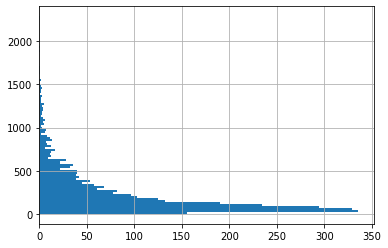

In [36]:
new_data2.nb_review.hist(bins=100, orientation='horizontal',)

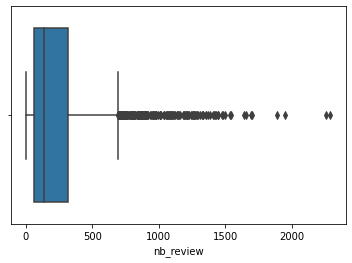

In [37]:
ax = sns.boxplot(data=new_data2,x="nb_review")

[array([64.,  1.]), array([314.75, 690.  ])]

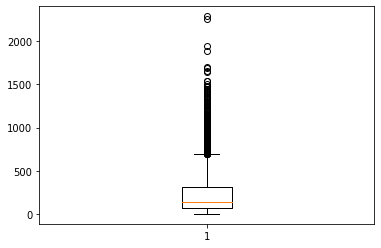

In [38]:
B = plt.boxplot(new_data2.nb_review)
[item.get_ydata() for item in B['whiskers']]

In [39]:
new_data2 = new_data2.sort_values(by='nb_review', ascending=False)

In [40]:
alpha = round(30000/690)
alpha

43

In [41]:
new_data2['owner_estimated'] = (new_data2['nb_review'] * alpha) + 20000

In [42]:
condition = lambda x: 50000 if x > 50000 else x

In [43]:
new_data2['owner_estimated'] = new_data2.owner_estimated.apply(condition)

In [44]:
new_data2[['name', 'nb_review', 'owner_estimated']].head(200)

,name,nb_review,owner_estimated
21373,DEAD OR ALIVE 6,2290,50000
6316,Call of Duty®: Modern Warfare® Remastered,2260,50000
5697,"Football, Tactics & Glory",1946,50000
6981,The Black Death,1890,50000
5614,Contradiction - Spot The Liar!,1705,50000
...,...,...,...
1930,Jagged Alliance Flashback,690,49670
5441,Garbage Day,688,49584
8974,Seven: Enhanced Edition,687,49541
13661,Accel World VS. Sword Art Online Deluxe Edition,681,49283


# Etude 50000-100000

In [45]:
new_data3 = data[data["owner_median"] == 75000]

<AxesSubplot:>

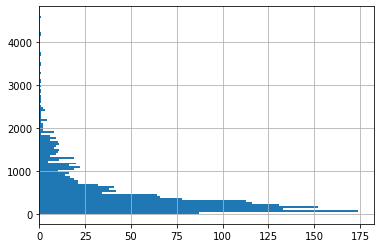

In [46]:
new_data3.nb_review.hist(bins=100, orientation='horizontal',)

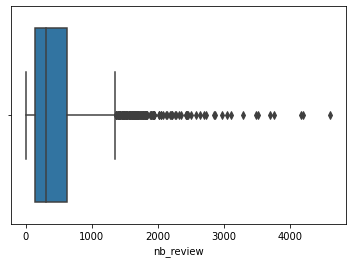

In [47]:
ax = sns.boxplot(data=new_data3,x="nb_review")

[array([146.,   3.]), array([ 629.5, 1350. ])]

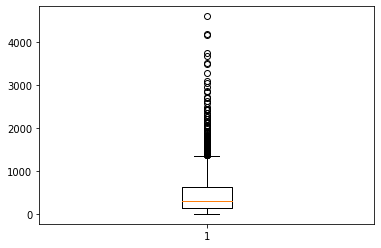

In [48]:
B = plt.boxplot(new_data3.nb_review)
[item.get_ydata() for item in B['whiskers']]

In [49]:
new_data3 = new_data3.sort_values(by='nb_review', ascending=False)

In [50]:
alpha = round(50000/1350)
alpha

37

In [51]:
new_data3['owner_estimated'] = (new_data3['nb_review'] * alpha) + 50000

In [52]:
condition = lambda x: 100000 if x > 100000 else x

In [53]:
new_data3['owner_estimated'] = new_data3.owner_estimated.apply(condition)

In [54]:
new_data3[['name', 'nb_review', 'owner_estimated']].tail(150)

,name,nb_review,owner_estimated
14128,Timen runner,67,52479
14130,POBEDA,67,52479
13720,Crazy Buggy Racing,66,52442
12722,Tourists Kidnapped a Little Bear,66,52442
5942,Lilly and Sasha: Guardian Angels,66,52442
...,...,...,...
12889,Prism Collider,10,50370
11725,Are You Ready?,9,50333
672,Elven Legacy: Siege,7,50259
13085,Carlos III y la difusión de la antigüedad,5,50185


# Etude 100000-200000

In [55]:
new_data4 = data[data["owner_median"] == 150000]

<AxesSubplot:>

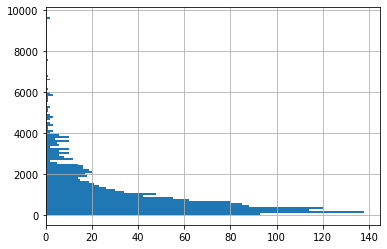

In [56]:
new_data4.nb_review.hist(bins=100, orientation='horizontal',)

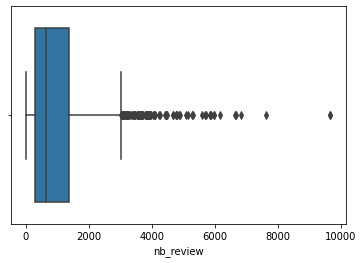

In [57]:
ax = sns.boxplot(data=new_data4,x="nb_review")

[array([294.5,  10. ]), array([1391., 3027.])]

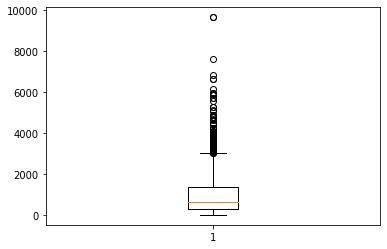

In [58]:
B = plt.boxplot(new_data4.nb_review)
[item.get_ydata() for item in B['whiskers']]

In [59]:
new_data4 = new_data4.sort_values(by='nb_review', ascending=False)

In [60]:
alpha = round(100000/3027)
alpha

33

In [61]:
new_data4['owner_estimated'] = (new_data4['nb_review'] * alpha) + 100000

In [62]:
condition = lambda x: 200000 if x > 200000 else x

In [63]:
new_data4['owner_estimated'] = new_data4.owner_estimated.apply(condition)

In [64]:
new_data4[['name', 'nb_review', 'owner_estimated']].head(150)

,name,nb_review,owner_estimated
13437,The Evil Within 2,9661,200000
12848,Sonic Mania,9653,200000
4755,SURVIVAL,7625,200000
5392,Hook,6829,200000
6592,Rabi-Ribi,6663,200000
...,...,...,...
11931,Stories Untold,2498,182434
6380,DEADBOLT,2493,182269
2273,X-Plane 11,2476,181708
8570,Megadimension Neptunia VII,2460,181180


# Etude 200000-500000 

In [65]:
new_data5 = data[data["owner_median"] == 350000]

<AxesSubplot:>

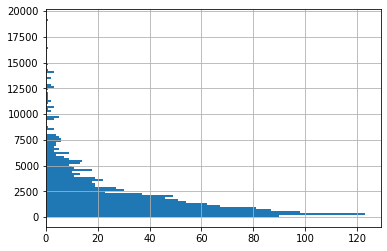

In [66]:
new_data5.nb_review.hist(bins=100, orientation='horizontal',)

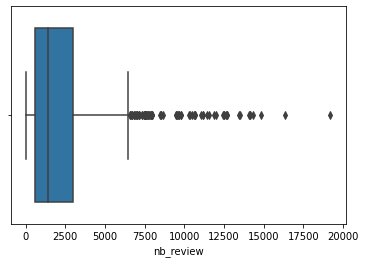

In [67]:
ax = sns.boxplot(data=new_data5,x="nb_review")

[array([592.75,  19.  ]), array([2974.25, 6424.  ])]

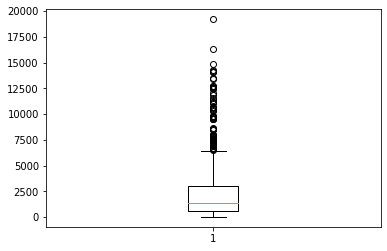

In [68]:
B = plt.boxplot(new_data5.nb_review)
[item.get_ydata() for item in B['whiskers']]

In [69]:
new_data5 = new_data5.sort_values(by='nb_review', ascending=False)

In [70]:
alpha = round(300000/6424)
alpha

47

In [71]:
new_data5['owner_estimated'] = (new_data5['nb_review'] * alpha) + 200000

In [72]:
condition = lambda x: 500000 if x > 500000 else x

In [73]:
new_data5['owner_estimated'] = new_data5.owner_estimated.apply(condition)

In [74]:
new_data5[['name', 'nb_review', 'owner_estimated']].tail(150)

,name,nb_review,owner_estimated
989,Memoir '44 Online,296,213912
936,Steel Storm: Burning Retribution,296,213912
5756,The Tower Of Elements,293,213771
10835,Turbo Pug 3D,291,213677
9493,Deep Space Dash,291,213677
...,...,...,...
14236,1914: Prelude to Chaos,63,202961
12070,Introvert Quest,55,202585
6970,Warfront Defenders: Westerplatte,31,201457
14293,Cosmic Pioneer,25,201175


# Etude 500000-1000000 

In [75]:
new_data6 = data[data["owner_median"] == 750000]

<AxesSubplot:>

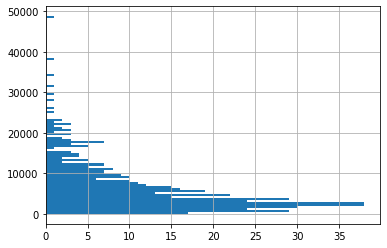

In [76]:
new_data6.nb_review.hist(bins=100, orientation='horizontal',)

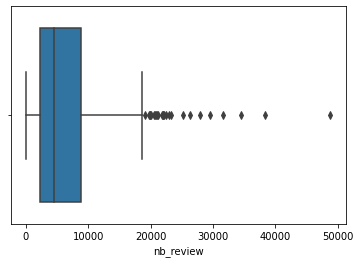

In [77]:
ax = sns.boxplot(data=new_data6,x="nb_review")

[array([2311.,   23.]), array([ 8883., 18605.])]

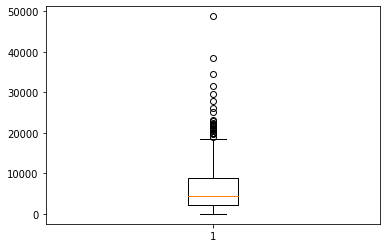

In [78]:
B = plt.boxplot(new_data6.nb_review)
[item.get_ydata() for item in B['whiskers']]

In [79]:
new_data6 = new_data6.sort_values(by='nb_review', ascending=False)

In [80]:
alpha = round(500000/18605)
alpha

27

In [81]:
new_data6['owner_estimated'] = (new_data6['nb_review'] * alpha) + 500000

In [82]:
condition = lambda x: 1000000 if x > 1000000 else x

In [83]:
new_data6['owner_estimated'] = new_data6.owner_estimated.apply(condition)

In [84]:
new_data6[['name', 'nb_review', 'owner_estimated']].head(150)

,name,nb_review,owner_estimated
10670,NieR:Automata™,48801,1000000
5961,Firewatch,38410,1000000
11692,Far Cry® 5,34454,1000000
7892,Conan Exiles,31595,1000000
6325,Squad,29547,1000000
...,...,...,...
755,Assassin’s Creed® Brotherhood,7605,705335
1633,Wasteland 2: Director's Cut,7530,703310
882,Sonic Generations Collection,7510,702770
12317,Kingdoms and Castles,7499,702473


# Création nouvelles features (2)

In [85]:
test = new_data[['steam_appid', 'owner_estimated']]
test2 = new_data2[['steam_appid', 'owner_estimated']]
test3 = new_data3[['steam_appid', 'owner_estimated']]
test4 = new_data4[['steam_appid', 'owner_estimated']]
test5 = new_data5[['steam_appid', 'owner_estimated']]
test6 = new_data6[['steam_appid', 'owner_estimated']]
test_final = pd.concat([test, test2, test3, test4, test5, test6])

In [86]:
data.shape

(26867, 400)

In [87]:
data = data.merge(test_final, on='steam_appid', how="outer")

In [88]:
data.shape

(26867, 401)

In [89]:
data['owner_estimated'] = data['owner_estimated'].fillna(value=data.owner_median)

In [90]:
data['revenu'] = data.owner_estimated * data.price

In [91]:
data.tail(20)

,steam_appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,...,wrestling,zombies,e_sports,owner_median,owner_lower,owner_upper,has_a_website,nb_review,owner_estimated,revenu
26847,1060770,"Die, zombie sausage, die!",2019-04-24,1,AuroraCorp,Aurora software,windows,Single-player;Steam Leaderboards,Action;Indie;Early Access,Early Access;Action;Indie,...,0,11,0,10000.0,0,20000,0,1,208.0,164.32
26848,1060870,"Hello, World.",2019-04-19,1,Meatball Parm Games,Meatball Parm Games,windows,Single-player,Casual;Indie,Casual;Indie,...,0,0,0,10000.0,0,20000,0,1,208.0,601.12
26849,1061230,Scream of the Viking 3,2019-04-16,1,LTrust,LTrust,windows,Single-player,Action;Adventure;Casual;Indie;Simulation,Action;Indie;Casual,...,0,0,0,10000.0,0,20000,0,5,1040.0,821.60
26850,1061470,Nyasha Valkyrie,2019-04-19,1,Zloy Krot Studio,IR Studio,windows,Single-player;Steam Achievements,Casual;Indie,Sexual Content;Indie;Casual,...,0,0,0,10000.0,0,20000,0,7,1456.0,1150.24
26851,1062120,Peas Adventure,2019-04-18,1,Artur Rezende,Artur Rezende,windows,Single-player;Full controller support,Casual;Indie,Casual;Indie,...,0,0,0,10000.0,0,20000,0,1,208.0,164.32
26852,1062240,地铁：恐怖末班车,2019-04-25,0,QZQ Studio,"H.P.Y.S,LLC",windows,Single-player,Action;Adventure;Indie;RPG,Action;Adventure;RPG,...,0,0,0,10000.0,0,20000,0,2,416.0,869.44
26853,1062670,Blacksmith Run,2019-04-19,1,Skull Box Games,КиКо,windows,Single-player,Indie,Indie,...,0,0,0,10000.0,0,20000,0,13,2704.0,2136.16
26854,1062880,Scream of the Viking REDUX,2019-04-18,1,LTrust,LTrust,windows,Single-player,Action;Adventure;Casual;Indie,Action;Indie;Casual,...,0,0,0,10000.0,0,20000,0,6,1248.0,985.92
26855,1063060,MonteCube Dodge,2019-04-22,1,MonteCube,MonteCube,windows,Single-player,Action;Adventure;Casual;Indie;Early Access,Early Access;Action;Indie,...,0,0,0,10000.0,0,20000,0,2,416.0,869.44
26856,1063230,6120,2019-04-19,1,indie_games_studio,indie_games_studio,windows,Single-player,Adventure;Indie,Indie;Adventure;Horror,...,0,11,0,10000.0,0,20000,0,11,2288.0,9129.12


# Enregistrement du csv

In [92]:
#data.to_csv(r'data_clean.csv', index = False)

# Encodage des certaines colonnes

Encodage des plateformes

In [93]:
ohe = OneHotEncoder(sparse = False)
ohe.fit(data[['platforms']])
platform_encoded = ohe.transform(data[['platforms']])

In [94]:
df1 = pd.DataFrame(platform_encoded)

In [95]:
data2 = data.join(df1)

In [96]:
data2.drop(columns='platforms', inplace= True)